<a href="https://colab.research.google.com/github/MUHAMMAD-BILAL-S/CODSOFT_TASK_1/blob/main/Codsoft_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-21-c19e559f5757>:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv("/content/train_data.txt",sep=':::',names=['Id', 'Title', 'Genre', 'Description'])


Accuracy: 0.5111131605644195


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.58      0.05      0.10       263
       adult        0.67      0.02      0.03       112
   adventure        0.38      0.02      0.04       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.51      0.40      0.45      1443
       crime        0.00      0.00      0.00       107
 documentary        0.57      0.89      0.69      2659
       drama        0.44      0.83      0.58      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.03      0.05        40
     history        0.00      0.00      0.00        45
      horror        0.76      0.26      0.39       431
       music        0.92      0.08      0.15       144
     musical        0.00      0.00      0.00        50
     mystery        0.00      0.00      0.00        56
        n

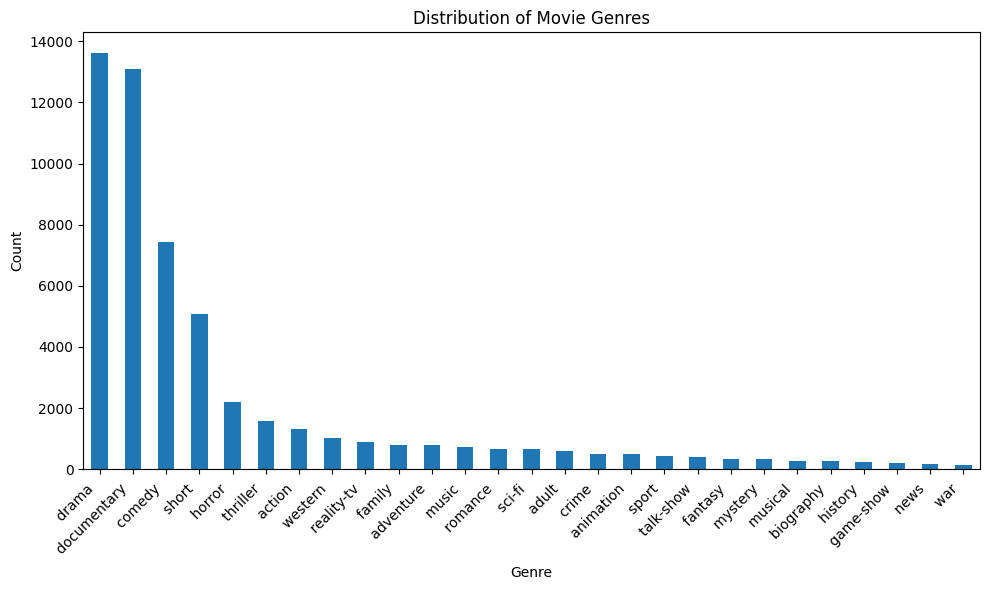

<Figure size 1000x600 with 0 Axes>

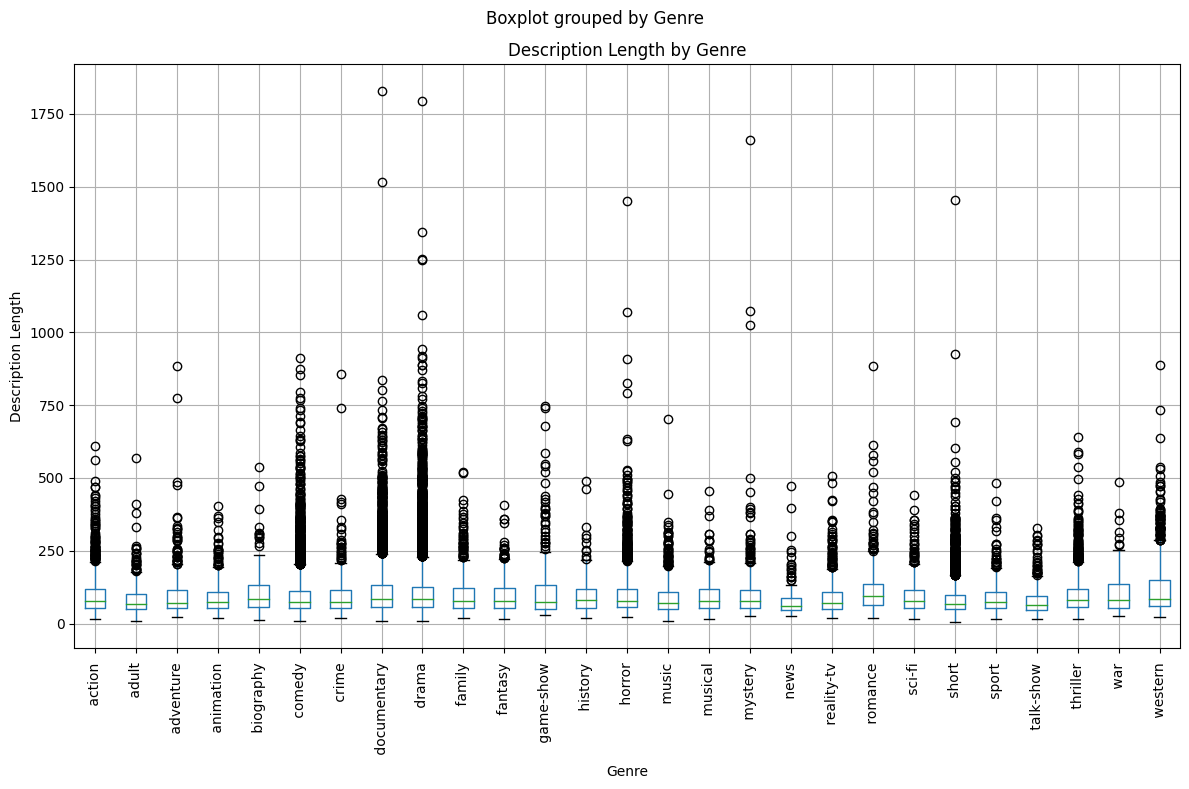

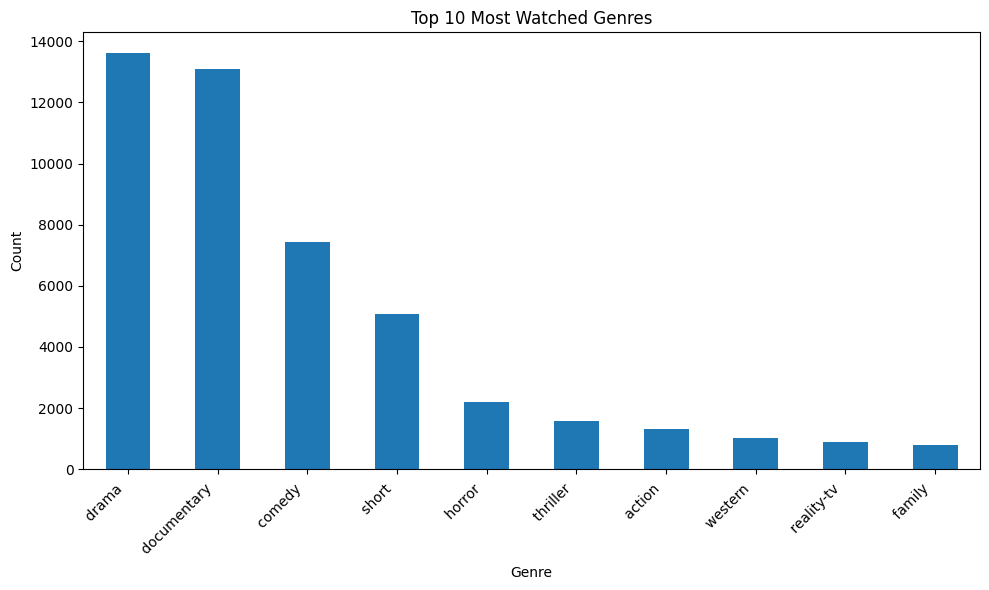

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv("/content/train_data.txt",sep=':::',names=['Id', 'Title', 'Genre', 'Description'])

# Drop rows with missing values
data = data.dropna(subset=['Genre', 'Description'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['Description'], data['Genre'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

data = data.dropna(subset=['Genre'])

# Count the occurrences of each genre
genre_counts = data['Genre'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

data = data.dropna(subset=['Genre', 'Description'])

# Calculate description lengths for each genre
data['Description Length'] = data['Description'].apply(lambda x: len(x.split()))

# Plotting
plt.figure(figsize=(10, 6))
data.boxplot(column='Description Length', by='Genre', figsize=(12, 8), rot=90)
plt.title('Description Length by Genre')
plt.xlabel('Genre')
plt.ylabel('Description Length')
plt.tight_layout()
plt.show()

data = data.dropna(subset=['Genre'])

# Count the occurrences of each genre
genre_counts = data['Genre'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(kind='bar')
plt.title('Top 10 Most Watched Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()